# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

### This is based on dataset from Semester 1.
### IGNORE! 
### DO NOT SUBMIT!

In [2]:
# This is based on dataset from Semester 1.
print("This is based on dataset from Semester 1.!")

This is based on dataset from Semester 1.!


The **Bank Customer Churn** dataset from [Kaggle](https://www.kaggle.com/datasets/ramyhafez/bank-customer-churn) contains account details for 10,000 European bank customers, including **credit score, balance, products, and churn status**, enabling churn analysis and prediction.

### **Who** – The Audience  
**Bank executives, product managers, and retention teams** need insights to reduce customer churn and improve engagement.  

### **What** – The Message  
- **Who churns?** Identify key customer profiles.  
- **Why do they churn?** Analyze trends in credit score, balance, and products.  
- **How to prevent it?** Recommend targeted retention strategies.  

### **How** – The Visual Story  
- **Churn rate overview** (simple KPI).  
- **Segment analysis** (bar charts, heatmaps).  
- **Customer journey flow** (Sankey/funnel).  
- **Key churn drivers** (correlation heatmap, decision tree).  
- **Actionable takeaways** (targeted outreach, personalized offers).  


# 3. Homework - work with your own data

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np


This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [8]:
dataset = pd.read_csv('data/bank/Bank_Churn.csv')
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
dataset_duplicates = dataset[dataset.duplicated()]

print("Duplicate Rows:\n", dataset_duplicates)


dataset_duplicates_by_customerid = dataset[dataset.duplicated(subset=['CustomerId'])]
dataset_duplicates_by_customerid.sort_values(by=['CustomerId']).head(10)


Duplicate Rows:
 Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

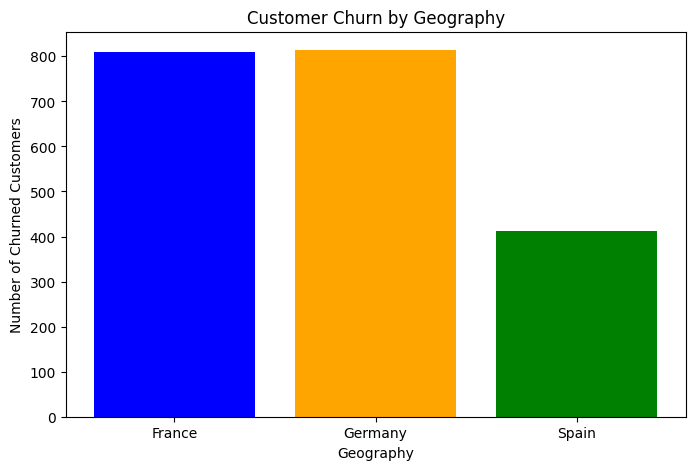

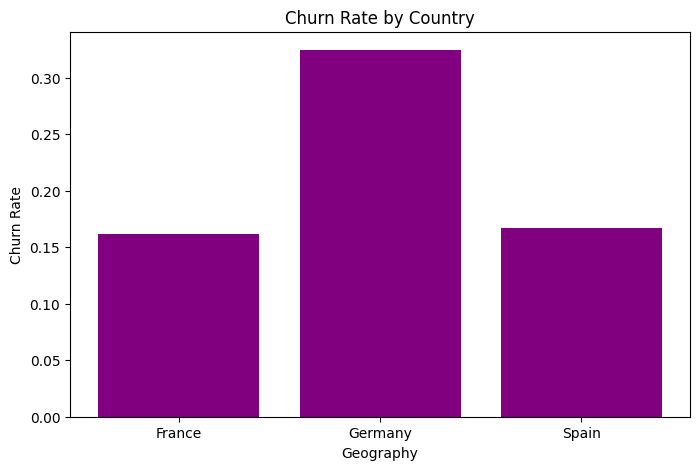

In [12]:
# Your code

customer_counts = dataset['Geography'].value_counts()
labels = customer_counts.index.tolist()
churn_counts = [dataset[dataset['Geography'] == country]['Exited'].sum() for country in labels]

plt.figure(figsize=(8,5))
plt.bar(labels, churn_counts, color=['blue', 'orange', 'green'])
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.title('Customer Churn by Geography')
plt.show()

# Churn to total customers rate by country
churn_rates = {country: dataset[dataset['Geography'] == country]['Exited'].sum() / count for country, count in customer_counts.items()}

plt.figure(figsize=(8,5))
plt.bar(labels, [churn_rates[country] for country in labels], color='purple')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Country')
plt.show()

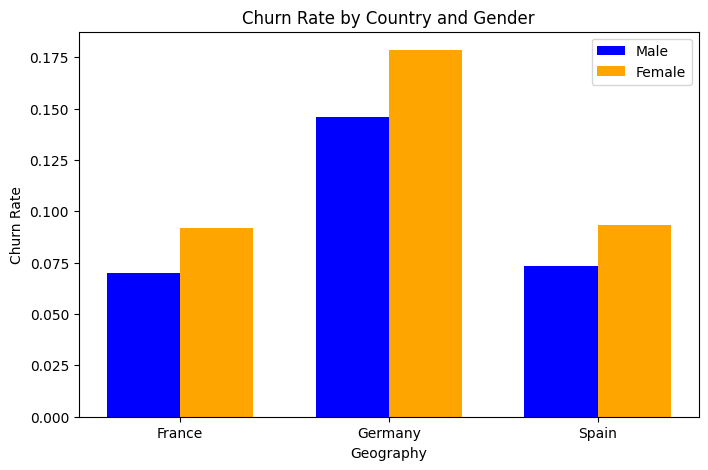

In [13]:
# Bar chart for churn rates with pairs of Male/Female for each country
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

male_churn = [
    dataset[(dataset['Geography'] == country) & (dataset['Gender'] == 'Male')]['Exited'].sum() / dataset[dataset['Geography'] == country].shape[0]
    for country in labels
]

female_churn = [
    dataset[(dataset['Geography'] == country) & (dataset['Gender'] == 'Female')]['Exited'].sum() / dataset[dataset['Geography'] == country].shape[0]
    for country in labels
]

ax.bar(x - width/2, male_churn, width, label='Male', color='blue')
ax.bar(x + width/2, female_churn, width, label='Female', color='orange')

ax.set_xlabel('Geography')
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Country and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()